In [1]:
import numpy as np
import pandas as pd
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score

In [6]:
pwd

'/Users/paxton615/GA/DSI9-lessons/week09/day3_bayes_rule_and_naive_bayes/naive-bayes-lesson'

In [8]:
data = pd.read_csv('/Users/paxton615/GA/resource-datasets/spam/spam_words_wide.csv')

In [9]:
data.keys()

Index(['is_spam', 'getzed', '86021', 'babies', 'sunoco', 'ultimately', 'thk',
       'voted', 'spatula', 'fiend',
       ...
       'itna', 'borin', 'thoughts', 'iccha', 'videochat', 'freefone', 'pist',
       'reformat', 'strict', '69698'],
      dtype='object', length=1001)

In [15]:
target = data.pop("is_spam")

In [26]:
model = naive_bayes.BernoulliNB()
model.fit(data.iloc[900:],target.iloc[900:])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [27]:
print(cross_val_score(model,data,target,cv=5).mean())

0.9373670608883271


In [28]:
model.predict

<bound method BaseNB.predict of BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)>

In [31]:
model.score(data.iloc[900:],target.iloc[900:])

0.9467037671232876

In [32]:
model.score(data,target)

0.9438262742282842

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [39]:
tweets_df = pd.read_csv('/Users/paxton615/GA/DSI9-lessons/week09/day3_bayes_rule_and_naive_bayes/naive-bayes-lab/datasets/tweets_language.csv')

In [40]:
tweets_df.head()

,Unnamed: 0,LANG,TEXT
0,0,en,The #Yolo bailout: Greece's ex-finance chief h...
1,1,en,Another mental Saturday night. It will be near...
2,2,en,Sometimes you take bedtime selfies w yer hat s...
3,3,en,Currently just changed my entire outfit includ...
4,4,en,I just like listening to @SpotifyAU's top 100 ...


In [46]:
tweets_df.shape

(9431, 2)

In [45]:
tweets_df.drop("Unnamed: 0", axis=1, inplace=True)

In [47]:
# 这是一个训练机器识别tweets内容是用那种语言写成的，这么一个问题。

In [48]:
tweets_df.index=tweets_df.index.astype(int)

In [49]:
tweets_df.head(2)

,LANG,TEXT
0,en,The #Yolo bailout: Greece's ex-finance chief h...
1,en,Another mental Saturday night. It will be near...


In [55]:
tweets_df.dropna(inplace=True)

In [56]:
tweets_df.isnull().sum()

LANG    0
TEXT    0
dtype: int64

In [57]:
# 看看哪些词出现过50次以上？

In [58]:
cvec = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
tw_trans = cvec.fit_transform(tweets_df["TEXT"])


In [65]:
type(tw_trans)

scipy.sparse.csr.csr_matrix

In [61]:
col = cvec.get_feature_names()

In [63]:
print(tw_trans.shape)

(9409, 32952)


In [66]:
x_df = pd.DataFrame(tw_trans.toarray(), columns=col)

In [68]:
x_df.head(2)

,00,000,001,0031,007,00j6mauvoo,00w4ed4xro,00一定要準時收看,01,01811,...,香格里拉台南遠東國際大飯店,香港金加利茶餐厅,高登,高速公路,高速稳定vpn,鬆獅,麥當勞,麻麻在旁邊喊著,黃金歲月快速的得到了也慢慢的逝去,龍洞四季灣
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
tf_df = pd.DataFrame(x_df.sum(),columns=["freq"])

In [70]:
tf_df.head(2)

,freq
00,11
000,18


In [77]:
tf_df = tf_df.sort_values("freq",ascending=False)

In [85]:
def hist_counts(a, bins=np.logspace(0,4,100), density=False):
    fig,ax = plt.subplots(figsize=(12,6))
    a.hist(bins=bins, ax=ax, density=density)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title("words counts his", color="r")
    return fig,ax

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a25f4e160>)

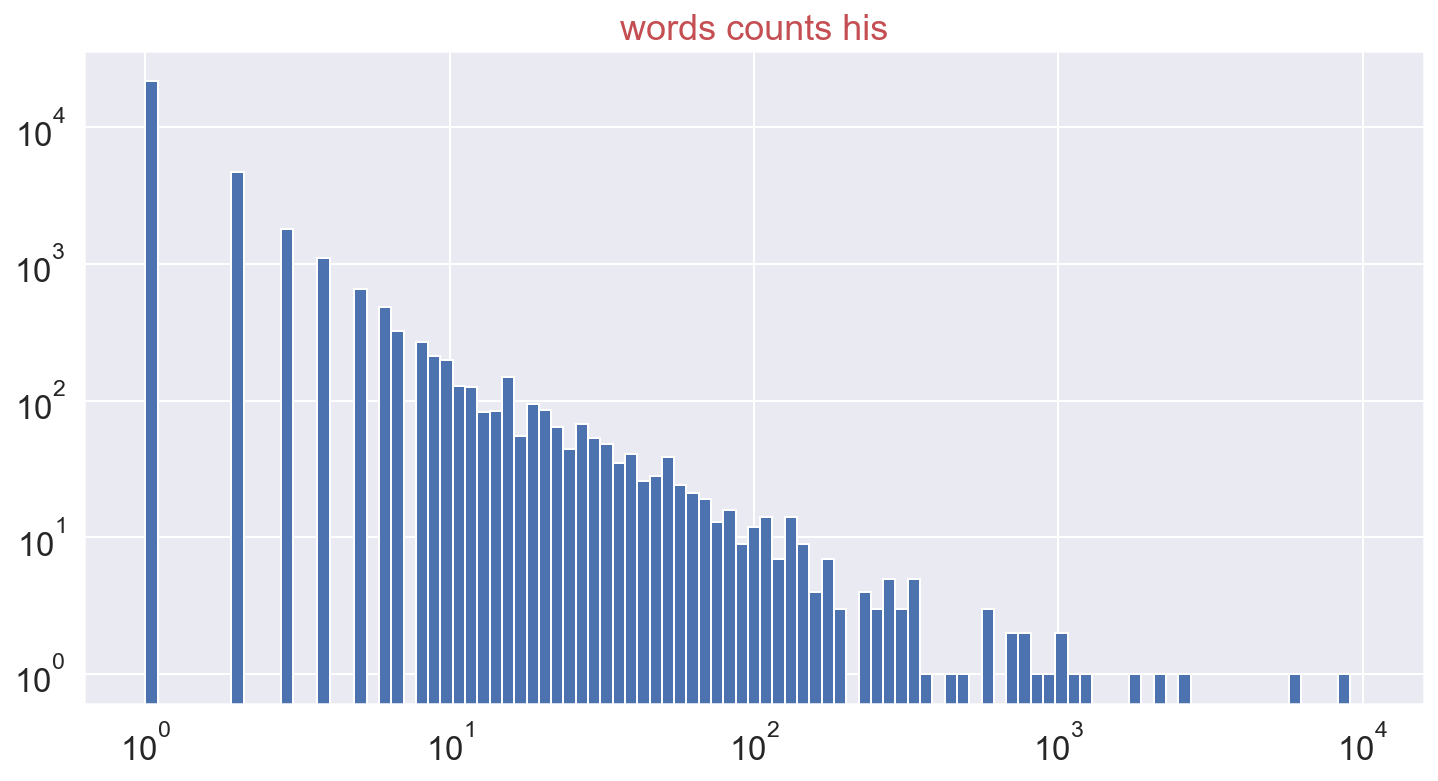

In [86]:
hist_counts(tf_df)

In [87]:
cvec = CountVectorizer(strip_accents='unicode',
                      stop_words = 'english',
                      ngram_range = (1,1))

In [88]:
X_all = cvec.fit_transform(tweets_df["TEXT"])

In [89]:
columns = cvec.get_feature_names()

In [92]:
x_df = pd.DataFrame(X_all.toarray(), columns=columns)

In [93]:
tf_df = pd.DataFrame(x_df.sum(), columns=['freq'])

In [95]:
tf_df=tf_df.sort_values("freq",ascending=False)

In [96]:
tf_df.head(20)

,freq
http,6093
https,2658
rt,2222
love,1758
dog,1219
family,1082
france,1032
da,889
peace,811
yolo,742


Text(0.5, 1.0, 'word counts')

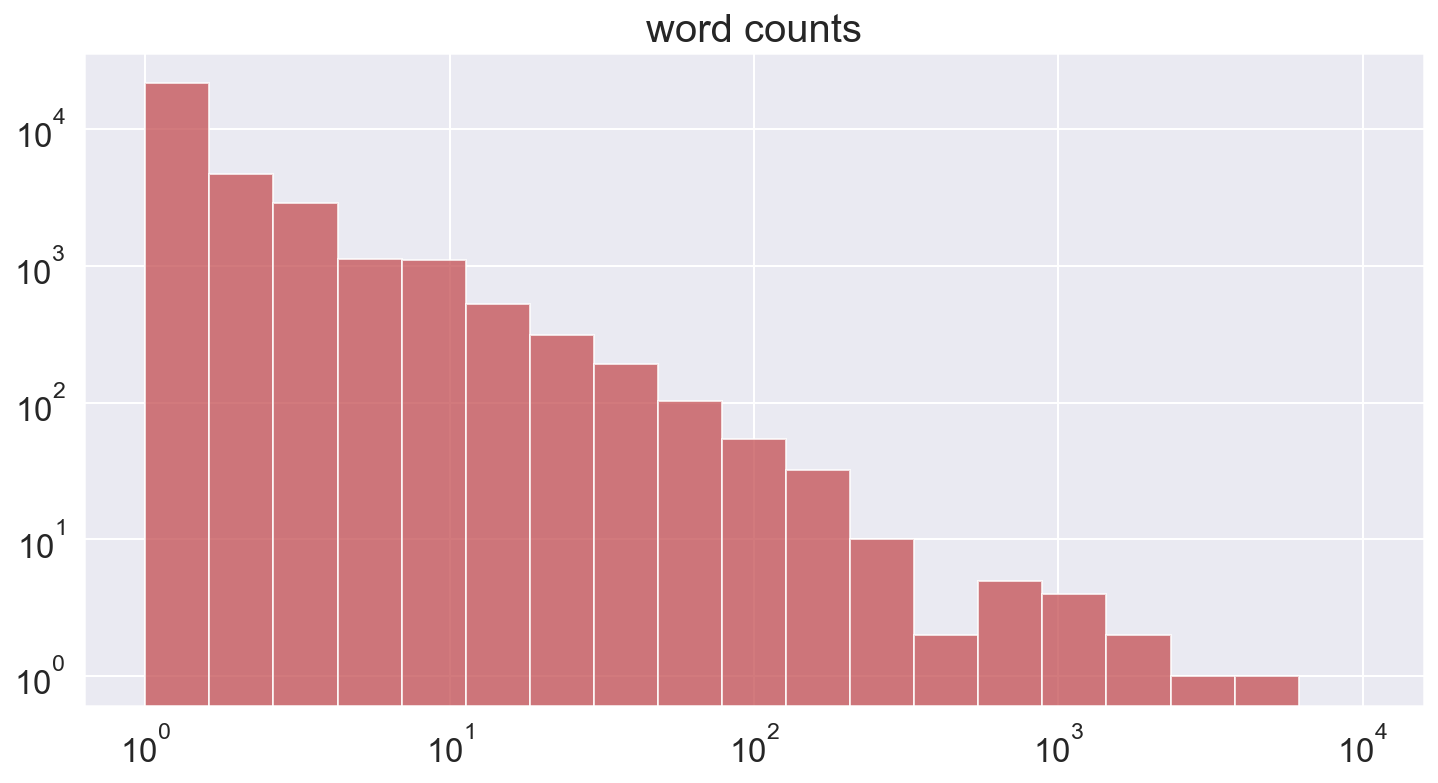

In [106]:
fig,ax = plt.subplots(figsize=(12,6))
tf_df['freq'].hist(bins=np.logspace(0,4,20), ax=ax,density=False, color='r',alpha=0.75)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('word counts',fontsize=20)